# COSMO Project
By Mathilde Raynal, Etienne Bonvin and Xavier Pantet

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from regressions import *

In [3]:
DATA_FOLDER = "data/"
X = np.load(DATA_FOLDER + "feature_mat_radial_compression.npy")
y = np.load(DATA_FOLDER + "CSD500-r_train-H_total.npy")

In [4]:
print("X: " + str(X.shape))
print("y: " + str(y.shape))

X: (30049, 15961)
y: (30049,)


In [5]:
x_df = pd.DataFrame(X)

In [6]:
x_df = x_df.drop_duplicates()
print("X: " + str(x_df.shape))

X: (30049, 15961)


In [7]:
def add_cte_col(df):
    df[df.shape[1]] = pd.Series(np.ones(df.shape[0]), index=df.index)

### Normalization:

In [8]:
x_df=(x_df-x_df.mean())/x_df.std()
x_df = x_df.drop(15960, axis=1)
x_df

0         1         2         3         4         5         6      \
0     -1.117537  0.130346  0.013696 -0.103711  0.037901  0.269922  0.399752   
1     -1.141154  0.360481  0.266127  0.079885  0.149372  0.394671  0.586697   
2     -1.177216 -0.267615 -0.349863 -0.416966 -0.393240 -0.265429 -0.145420   
3     -1.125873  0.708498  0.511915  0.345341  0.678018  0.960304  0.994918   
4     -1.301681  0.035031 -0.075285 -0.190359 -0.102609  0.108780  0.216456   
5     -1.289225  0.618264  0.440396  0.333169  0.531440  0.795734  0.815010   
6     -1.280896 -0.263859 -0.355730 -0.418794 -0.397849 -0.229321 -0.186046   
7     -1.244046  0.480159  0.363812  0.202020  0.349861  0.564196  0.670118   
8     -1.121709  0.117122  0.008087 -0.111065  0.043313  0.242077  0.372759   
9     -1.120282  0.673164  0.520629  0.353339  0.604866  0.836481  0.911321   
10    -1.161999 -0.170808 -0.280091 -0.345389 -0.215225 -0.066473  0.016016   
11    -1.109925  0.348278  0.253625  0.084104  0.181172  0.375732  0.543186   
12    -1.583999 -0.101838 -0.187720 -0.265902 -0.204427 -0.061798  0.052346   
13    -1.532105  1.795420  1.494828  1.117432  1.433854  1.637722  1.598290   
14    -1.556035  0.854810  0.650248  0.425941  0.679988  0.941011  1.006641   
15    -1.509894  0.789489  0.734525  0.508362  0.519640  0.669836  0.828015   
16    -1.468620 -0.150050 -0.231988 -0.305689 -0.293819 -0.157557 -0.017568   
17    -1.348397  1.315641  1.142931  0.767735  0.831600  1.091384  1.288360   
18    -1.424677  0.814512  0.635795  0.410424  0.590902  0.841481  0.965004   
19    -1.448649  0.953664  0.895262  0.685877  0.683935  0.826307  0.964385   
20    -1.278326  0.070219 -0.079248 -0.149880  0.035801  0.252874  0.299863   
21    -1.252883  1.984057  1.699722  1.269265  1.680939  1.881720  1.838494   
22    -1.262766  0.841785  0.652353  0.419199  0.595580  0.874963  0.988802   
23    -1.218103  1.756039  1.288217  1.090831  1.765646  2.002212  1.701695   
24    -1.466737  0.364266  0.242847  0.073562  0.230399  0.449496  0.555549   
25    -1.352696  1.183222  1.100144  1.028277  1.242592  1.268293  1.135938   
26    -1.468931  1.565876  1.444560  1.036704  1.104169  1.244886  1.364998   
27    -1.458226  0.916002  0.717254  0.499095  0.826848  1.040904  1.066190   
28    -1.244967  0.528076  0.344597  0.199056  0.392641  0.695089  0.841445   
29    -1.293424  0.144455  0.085388 -0.061860 -0.129136  0.019201  0.244424   
...         ...       ...       ...       ...       ...       ...       ...   
30019 -0.370322 -0.226526 -0.080004  0.137031  0.086162 -0.119531 -0.156182   
30020 -0.450635 -0.273962 -0.139269  0.032197 -0.022757 -0.183572 -0.200784   
30021 -0.187353 -0.270201  0.036723  0.143085  0.077921 -0.010722 -0.187752   
30022 -0.131709 -0.348489  0.022155  0.146214 -0.060469  0.040867 -0.220123   
30023 -0.257295 -0.020362  0.223802  0.497554  0.422577  0.160234  0.069173   
30024 -0.235252 -0.348016 -0.273893 -0.148297 -0.189325 -0.300012 -0.311168   
30025 -0.640975 -0.069737  0.169179  0.413493  0.326494  0.088665  0.006096   
30026 -0.663981 -0.372109 -0.311566 -0.198239 -0.240748 -0.326981 -0.340134   
30027 -0.230168 -0.593888 -0.690791 -0.726956 -0.790438 -0.786404 -0.779407   
30028 -0.152333 -0.593858 -0.690671 -0.726842 -0.789973 -0.786032 -0.779394   
30029 -0.177146 -0.593535 -0.690716 -0.726345 -0.790382 -0.786526 -0.779568   
30030 -0.103032 -0.591436 -0.688319 -0.720435 -0.786312 -0.781232 -0.776616   
30031 -0.628451  1.478194  1.291831  0.971006  1.226689  1.495998  1.564524   
30032 -0.491152  4.312278  3.026329  3.150740  4.943784  4.504436  3.031359   
30033 -0.463041  1.042719  1.027699  1.067549  0.942277  1.278240  1.298286   
30034 -0.339190  1.840738  2.743920  2.352763  1.766222  1.875938  1.432170   
30035 -0.664271  1.717509  1.396907  1.150691  1.599951  1.855306  1.841164   
30036 -0.661311  2.016270  2.271368  2.057335  1.715165  1.402226  1.495051   
30037 -0.314646  1.329707  1.024431  0.905956  1.607941  1.8

In [9]:
print(rmse(y, X, ridge_regression(y, X, 1e-20)))

0.6694541037562393


In [10]:
test_x_df = x_df.copy()
add_cte_col(test_x_df)
print(rmse(y, test_x_df, ridge_regression(y, test_x_df, 1e-20)))

0.5759801642995568


### Correlation:

In [11]:
to_rm = []
for i in [i for i in x_df if i < 50]:
    for j in [j for j in x_df if j > i]:
        if x_df[i].corr(x_df[j]) > 0.95:
            to_rm.append(j)
x_df_uncorr = x_df.drop(to_rm, axis=1)

In [12]:
print(x_df_uncorr.shape)
add_cte_col(x_df_uncorr)
print(rmse(y, x_df_uncorr, ridge_regression(y, x_df_uncorr, 1e-20)))

(30049, 15916)
0.6715760381181618


### PCA

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
rmses = []
ys = range(500, 5501, 500)
for i in ys:
    pca = PCA(n_components=i, whiten=True)
    principalComponents = pca.fit_transform(x_df, x_df.shape)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = range(principalComponents.shape[1]))
    add_cte_col(principalDf)
    err = rmse(y, principalDf, ridge_regression(y, principalDf, 1e-20))
    rmses.append(err)
    print(i, err)

500 1.101922386896812
1000 0.9174749789129878
1500 0.8019785307031853
2000 0.7264098810102873
2500 0.6658863507026302
3000 0.6116553698840418
3500 0.5573907786588962
4000 0.506563561998478
4500 0.46327181515153865
5000 0.42743969922375125
5500 0.3935018911944511


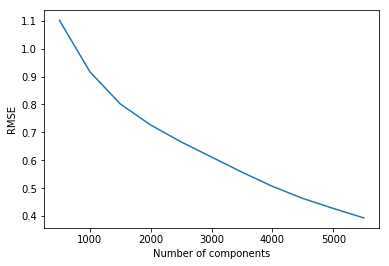

In [15]:
plt.xlabel("Number of components")
plt.ylabel("RMSE")
plt.plot(ys, rmses)
plt.show()

In [18]:
i_star = 3500
pca = PCA(n_components=i_star, whiten=True)
principalComponents = pca.fit_transform(x_df, x_df.shape)
principalDf_star = pd.DataFrame(data = principalComponents
             , columns = range(principalComponents.shape[1]))
add_cte_col(principalDf_star)
print(rmse(y, principalDf_star, ridge_regression(y, principalDf_star, 1e-20)))

0.5553591162406514


In [19]:
principalDf_star.columns = range(principalDf_star.shape[1])

In [20]:
np.save("data/pca_x.npy", principalDf)

In [ ]:
i_star = 3500
pca = PCA(n_components=i_star)
principalComponents_no_w = pca.fit_transform(x_df, x_df.shape)
principalDf_star_no_w = pd.DataFrame(data = principalComponents_no_w
             , columns = range(principalComponents_no_w.shape[1]))
add_cte_col(principalDf_star_no_w)
print(rmse(y, principalDf_star_no_w, ridge_regression(y, principalDf_star_no_w, 1e-20)))

In [20]:
#ValueError: math domain error is known bug : https://github.com/scikit-learn/scikit-learn/issues/10217

In [21]:
pca = PCA(n_components='mle', whiten=True)
principalComponents_mle = pca.fit_transform(principalDf_star, principalDf_star.shape)
principalDf_mle = pd.DataFrame(data = principalComponents_mle
             , columns = range(principalComponents_mle.shape[1]))

ValueError: math domain error